# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Data Analysis & Preprocessing

## Data Info

In [4]:
df = pd.read_csv("/content/Churn_Modelling.csv")

df.drop(columns=["RowNumber"], inplace=True)

target_col = "Exited"

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [8]:
df[df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


## EDA

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.drop(['Surname','Geography','Gender'],axis=1).corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Based on corr, balance,age,isactivemember,numprod contribute to churn more

## Feature Engineering

### Encoding

In [9]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df,columns=['Geography'],drop_first = True)

In [10]:
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


### train_test split

In [35]:
features = ['CustomerId','CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
X = df[features]
y = df['Exited']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### scaling

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

## RandomForest

In [38]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = model.predict(X_test)

In [40]:
con_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [41]:
con_matrix

array([[1548,   59],
       [ 210,  183]])

In [42]:
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [43]:
accuracy

0.8655

### feaure_importance

<function matplotlib.pyplot.show(close=None, block=None)>

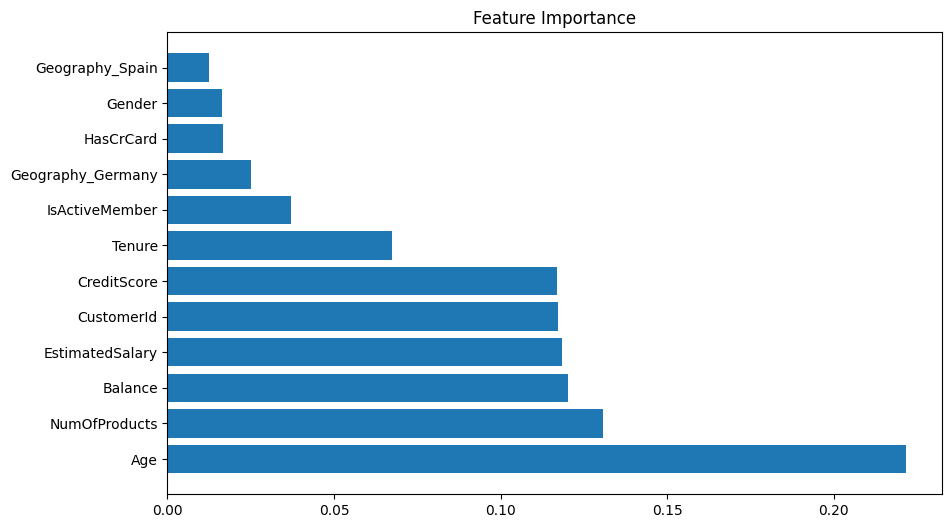

In [44]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices] )
plt.yticks(range(X.shape[1]),names)
plt.show

### XAI

In [65]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

In [67]:
shap_values

array([[[ 0.0009361 , -0.0009361 ],
        [ 0.00654698, -0.00654698],
        [ 0.02614163, -0.02614163],
        ...,
        [ 0.001812  , -0.001812  ],
        [-0.04299256,  0.04299256],
        [-0.00025802,  0.00025802]],

       [[ 0.00313985, -0.00313985],
        [ 0.00303154, -0.00303154],
        [ 0.01538446, -0.01538446],
        ...,
        [ 0.00424999, -0.00424999],
        [ 0.010289  , -0.010289  ],
        [-0.00102641,  0.00102641]],

       [[ 0.00357632, -0.00357632],
        [ 0.01278772, -0.01278772],
        [-0.03838339,  0.03838339],
        ...,
        [-0.0087592 ,  0.0087592 ],
        [ 0.01344215, -0.01344215],
        [ 0.00660077, -0.00660077]],

       ...,

       [[-0.02127718,  0.02127718],
        [-0.02027881,  0.02027881],
        [-0.04920407,  0.04920407],
        ...,
        [-0.01041835,  0.01041835],
        [ 0.00647832, -0.00647832],
        [ 0.00350651, -0.00350651]],

       [[ 0.01336823, -0.01336823],
        [ 0.00963341, -0.00

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(random_state=42)
logR.fit(X_train,y_train)

y_pred_log = logR.predict(X_test)

In [46]:
con_matrix = confusion_matrix(y_test,y_pred_log)
class_report = classification_report(y_test,y_pred_log)
accuracy = accuracy_score(y_test,y_pred_log)

In [47]:
print(con_matrix,class_report,accuracy)

[[1543   64]
 [ 315   78]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.8105


## SVM

In [48]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear',random_state=42)
svm_model.fit(X_train,y_train)

y_pred_svm = svm_model.predict(X_test)



In [49]:
con_matrix = confusion_matrix(y_test,y_pred_svm)
class_report = classification_report(y_test,y_pred_svm)
accuracy = accuracy_score(y_test,y_pred_svm)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
print(con_matrix,class_report,accuracy)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

y_pred_knn = knn_model.predict(X_test)

In [52]:
con_matrix = confusion_matrix(y_test,y_pred_knn)
class_report = classification_report(y_test,y_pred_knn)
accuracy = accuracy_score(y_test,y_pred_knn)

In [53]:
print(con_matrix,class_report,accuracy)

[[1517   90]
 [ 252  141]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.36      0.45       393

    accuracy                           0.83      2000
   macro avg       0.73      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.829


## GBM

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

GBM= GradientBoostingClassifier(n_estimators=100,random_state=42)
GBM.fit(X_train,y_train)

y_pred_gbm = GBM.predict(X_test)

In [57]:
con_matrix = confusion_matrix(y_test,y_pred_knn)
class_report = classification_report(y_test,y_pred_knn)
accuracy = accuracy_score(y_test,y_pred_knn)

In [58]:
print(con_matrix,class_report,accuracy)

[[1517   90]
 [ 252  141]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.36      0.45       393

    accuracy                           0.83      2000
   macro avg       0.73      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.829


### XGBoost

In [3]:
import pandas as pd

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Step 4: Define XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Step 5: Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Step 6: GridSearchCV
grid = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train, y_train)

# Step 7: Evaluation
print("✅ Best Parameters:", grid.best_params_)

y_pred = grid.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


NameError: name 'X_train' is not defined